In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
%matplotlib inline
from pandas import Series
from pandas import DataFrame
from pandas.tools.plotting import scatter_matrix
from pylab import rcParams
import scipy as sp
import seaborn as sns

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

import sklearn
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn import datasets

from IPython.display import Image
from IPython.core.display import HTML

### Extreme value analysis using univariate analysis

In [44]:
rcParams['figure.figsize'] = 8,4
sns.set_style('whitegrid')

In [45]:
df = pd.read_csv('C:/Users/mailm_000/Desktop/Python Learning/Ex_Files_Python_Data_Science_EssT/Ex_Files_Python_Data_Science_EssT/Exercise Files/Ch05/05_02/iris.data.csv',
                 header=None,
                sep=',')
df.head()

df.columns=['sepal_length','sepal_width','petal_length','pedal_width','species']

x=df.iloc[:,0:4]
y=df.iloc[:,4]

df.head()

,sepal_length,sepal_width,petal_length,pedal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<function matplotlib.pyplot.plot(*args, **kwargs)>

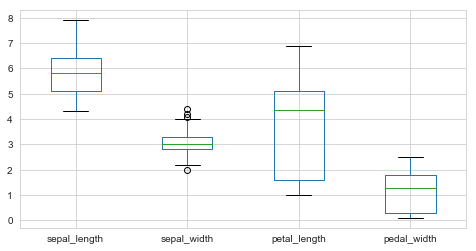

In [46]:
df.boxplot()
plt.plot

In [47]:
iris_outlier= df.query("sepal_width> 4 or sepal_width <2.05")
iris_outlier

,sepal_length,sepal_width,petal_length,pedal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


In [48]:
df[(df.sepal_width > 4) | (df.sepal_width <2.05)]

,sepal_length,sepal_width,petal_length,pedal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


In [49]:
df.sepal_width.min()

2.0

### Apply Tukey outlier labeling

In [50]:
#set disply setting for no more than 1 decimal point
pd.options.display.float_format ='{:.1f}'.format
x_df= pd.DataFrame(x)
print(x_df.describe())

       sepal_length  sepal_width  petal_length  pedal_width
count         150.0        150.0         150.0        150.0
mean            5.8          3.1           3.8          1.2
std             0.8          0.4           1.8          0.8
min             4.3          2.0           1.0          0.1
25%             5.1          2.8           1.6          0.3
50%             5.8          3.0           4.3          1.3
75%             6.4          3.3           5.1          1.8
max             7.9          4.4           6.9          2.5


### Multivariate analysis for outlier detection

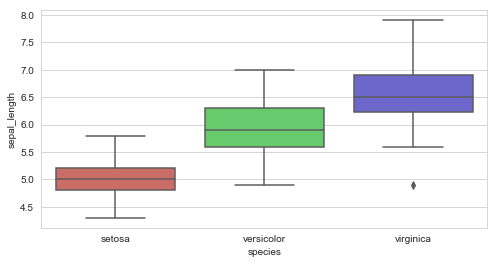

In [51]:
#box plot data with seaborn

sns.boxplot(data=df,x='species',y='sepal_length',palette='hls')

C:\Users\mailm_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


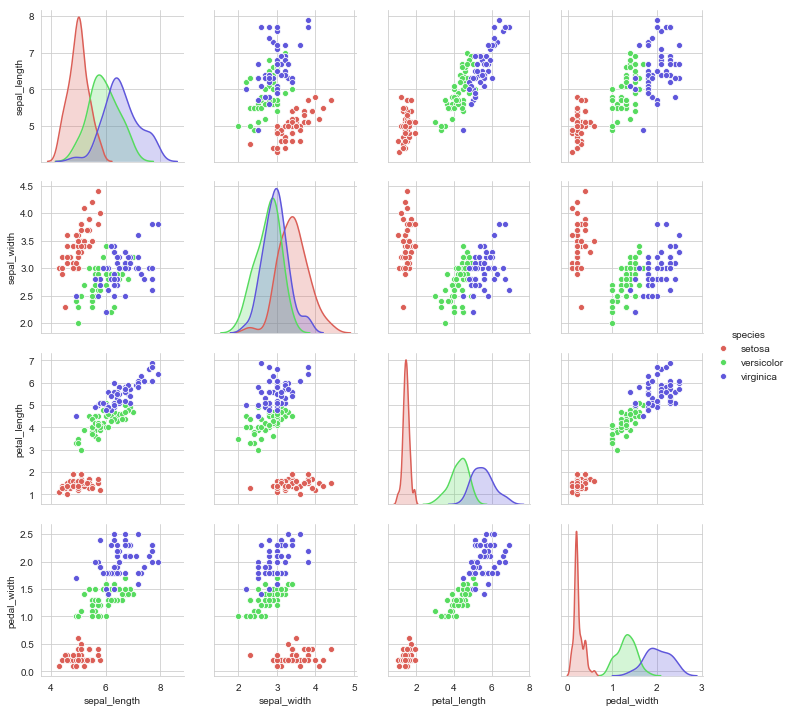

In [52]:
#plot a pair plot
sns.pairplot(df,hue='species',palette='hls')

### DBScan to identify outliers

In [53]:
#eps= the max distance between two samples for them to be considered in the same neighborhood (start at eps=0.1)
#min_samples = the min number of samples in a neighborhood for a data point to be considered a core point (star with low value)
# adjust the above samples so that outliers consist of no more than 5% of your total data
model=DBSCAN(eps=0.8,min_samples=19).fit(x)
print (model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=1, p=None)


In [57]:
### visualize the results

outlier_df=pd.DataFrame(x)
print(Counter(model.labels_)) # this is to see how many datapoints are assigned to each label

print(outlier_df[model.labels_==-1])


Counter({1: 94, 0: 50, -1: 6})
     sepal_length  sepal_width  petal_length  pedal_width
98            5.1          2.5           3.0          1.1
105           7.6          3.0           6.6          2.1
117           7.7          3.8           6.7          2.2
118           7.7          2.6           6.9          2.3
122           7.7          2.8           6.7          2.0
131           7.9          3.8           6.4          2.0


In [56]:
model

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=1, p=None)

<function matplotlib.pyplot.show(*args, **kw)>

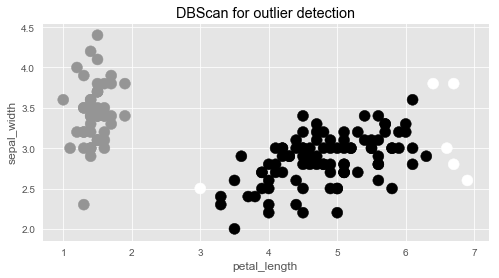

In [81]:
plt.style.use('ggplot')

x.plot(kind='scatter',x='petal_length',y='sepal_width',c=model.labels_,s=120)
plt.title('DBScan for outlier detection',color='black')
plt.show

#white dots are the outliers

C:\Users\mailm_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


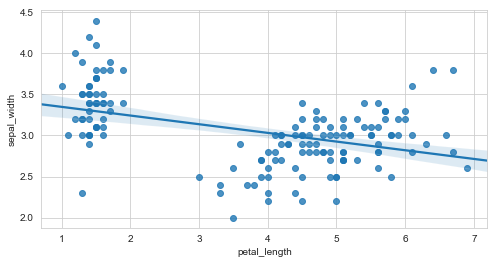

In [63]:
sns.regplot(data=x,x='petal_length',y='sepal_width',scatter=True)

In [73]:
print(plt.style.available)



['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
